MLP 활용 회귀, 데이터 직군 연봉 예측

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리 및 EDA」
* 🥈Session 2 - 「가설 수립 및 검증」
* 🥇Session 3 - 「MLP 활용 연봉 예측」

#### 데이터 EDA 및 전처리

In [2]:
# ▶ pd.set option
import pandas as pd
pd.set_option('display.max_columns',100)  # 행/렬을 최대 몇개씩 출력할지
pd.set_option('display.max_rows',100)

# ▶ Data read
df = pd.read_csv("ds_salaries.csv")
df.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [3]:
# ▶ Data 형태 확인
# ▶ 607 row, 12 col로 구성됨
print('df :', df.shape)

df : (607, 12)


In [4]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
# ▶ Null 값 확인
print(df.isnull().sum())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [6]:
# ▶ Outlier 확인
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
# ▶ 필요 없는 변수 사전 제거
# ▶ 범용적으로 사용할 수 있는 salary_in_usd col만 사용
df = df.drop(['Unnamed: 0', 'salary_currency', 'salary'], axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [8]:
# ▶ 숫자형, 범주형 변수 분할
numerical_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categorical_list.append(i)
  else :
    numerical_list.append(i)

print("categorical_list :", categorical_list)
print("numerical_list :", numerical_list)

categorical_list : ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
numerical_list : ['work_year', 'salary_in_usd', 'remote_ratio']


In [9]:
# ▶ 범주형 변수 유니크 값 출력
list_of_df = []

for var in categorical_list :
  loop_df = pd.DataFrame({'var':[var], 'ncnt':[df[var].nunique()]})
  list_of_df.append(loop_df)

df_concat = pd.concat(list_of_df).reset_index(drop=True) #reset_index 안하면 인덱스가 모두 0으로 되어있음
df_concat

,var,ncnt
0,experience_level,4
1,employment_type,4
2,job_title,50
3,employee_residence,57
4,company_location,50
5,company_size,3


In [26]:
# ▶ job_title 살펴보기
df_job = pd.DataFrame(df['job_title'].value_counts())
df_job.head(4)

,count
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41


<BarContainer object of 50 artists>

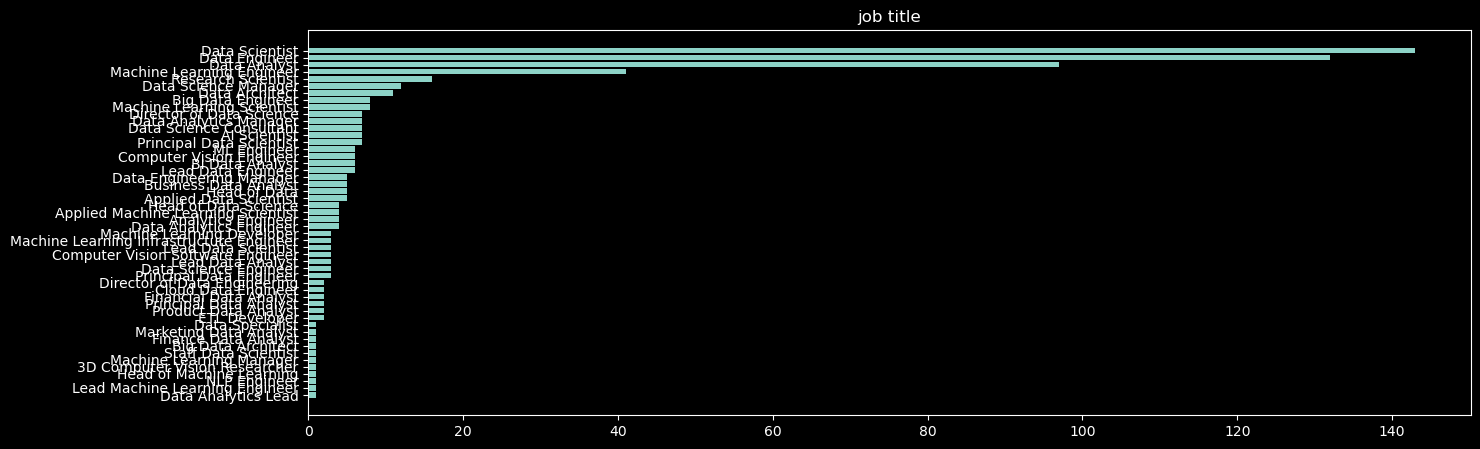

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

df_job = df_job.sort_values(by=['count'])


fig = plt.figure(figsize=(15,5))
plt.title('job title')
plt.barh(df_job.index, df_job['count'])
# plt.xticks(rotation=-90);

In [29]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


#### 파이토치 텐서 데이터 형태로 변환

In [30]:
# ▶ 범주형 변수를 모델이 이해하기 위한 숫자현 데이터로 변환(OneHotEncoder)
# ▶ 범주형 변수의 Level이 예제와 같이 많다고 하면, 다른 인코딩 방법을 고려해 볼 수 도 있음 ex) Binary encoding, Hash encoding 등
# ▶ 완벽한 정답은 없음, 모든 방법을 테스트해 보고 성능을 고려하는 것이 Best

from sklearn.preprocessing import OneHotEncoder

for col in categorical_list :
  encoder = OneHotEncoder()
  onehot = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray(), columns = encoder.get_feature_names_out())
  # 기존 Col은 삭제
  df = pd.concat([df,onehot], axis = 1).drop(columns = [col])

In [31]:
df.head()

,work_year,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_3D Computer Vision Researcher,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,job_title_BI Data Analyst,job_title_Big Data Architect,job_title_Big Data Engineer,job_title_Business Data Analyst,job_title_Cloud Data Engineer,job_title_Computer Vision Engineer,job_title_Computer Vision Software Engineer,job_title_Data Analyst,job_title_Data Analytics Engineer,job_title_Data Analytics Lead,job_title_Data Analytics Manager,job_title_Data Architect,job_title_Data Engineer,job_title_Data Engineering Manager,job_title_Data Science Consultant,job_title_Data Science Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Data Specialist,job_title_Director of Data Engineering,job_title_Director of Data Science,job_title_ETL Developer,job_title_Finance Data Analyst,job_title_Financial Data Analyst,job_title_Head of Data,job_title_Head of Data Science,job_title_Head of Machine Learning,job_title_Lead Data Analyst,job_title_Lead Data Engineer,job_title_Lead Data Scientist,job_title_Lead Machine Learning Engineer,job_title_ML Engineer,job_title_Machine Learning Developer,job_title_Machine Learning Engineer,...,company_location_AU,company_location_BE,company_location_BR,company_location_CA,company_location_CH,company_location_CL,company_location_CN,company_location_CO,company_location_CZ,company_location_DE,company_location_DK,company_location_DZ,company_location_EE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_HN,company_location_HR,company_location_HU,company_location_IE,company_location_IL,company_location_IN,company_location_IQ,company_location_IR,company_location_IT,company_location_JP,company_location_KE,company_location_LU,company_location_MD,company_location_MT,company_location_MX,company_location_MY,company_location_NG,company_location_NL,company_location_NZ,company_location_PK,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,2020,79833,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,260000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2020,109024,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020,20000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# ▶ Pytorch libraries import
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X=df.drop(['work_year', 'salary_in_usd'], axis=1)
Y=df['salary_in_usd']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [33]:
# ▶ 딥러닝에서 Scaling을 하는 이유
# 1) 학습 시에 미치는 중요도 일반화
# 2) Gradient descent 사용할 때 수렴 속도를 높임
# 3) 시그모이드 함수와 같은 활성 함수를 사용할 때, saturation현상(가중치 업데이트 X)이 빨리 일어나지 않도록 도와줌
# 4) Local Minimum에 빠질 위험을 감소 시킴
scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(x_train.values)
x_test =  scaler.transform(x_test.values)

In [34]:
x_train

array([[0.5, 0. , 0. , ..., 1. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       ...,
       [1. , 0. , 0. , ..., 0. , 1. , 0. ],
       [1. , 0. , 0. , ..., 0. , 1. , 0. ],
       [1. , 1. , 0. , ..., 0. , 0. , 1. ]])

##### · Tensor 변환
---
* 데이터 셋을 Pytorch Tensor 데이터 셋으로 변환
* Tensor : 다차원의 배열을 통칭

In [44]:
print(y_train.shape, y_train.values.ravel().shape)

(485,) (485,)


In [50]:
# ▶ torch.from_numpy 함수를 통해 데이터를 torch에서 인식할 수 있는 tesnor 형태로 변환
# ▶ ravel() : 다차원 배열을 1차원에 배열로 평탄화
x_tensor =  torch.from_numpy(x_train).float()
y_tensor =  torch.from_numpy(y_train.values).float()
xtest_tensor =  torch.from_numpy(x_test).float()
ytest_tensor =  torch.from_numpy(y_test.values.ravel()).float()

print("[Train set Tensors] \n")
print(x_tensor)
print(y_tensor.shape)
print("\n[Test set Tensors] \n")
print(xtest_tensor)
print(ytest_tensor)

[Train set Tensors] 

tensor([[0.5000, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        ...,
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [1.0000, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000]])
torch.Size([485])

[Test set Tensors] 

tensor([[0.5000, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 1.0000,  ..., 0.0000, 1.0000, 0.0000],
        ...,
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.5000, 0.0000, 1.0000,  ..., 1.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000]])
tensor([ 90734.,  40481., 200000.,  36259., 120000., 112000.,  38400., 200000.,
        120000.,  54238.,  60000., 156600.,  20000.,  66022., 

In [53]:
# ▶ 배치 사이즈 선정 (batch, iteration, epoch 개념 숙지)
# 1) batch : 한 번에 학습시킬 데이터의 양
# 2) epoch : 전체 학습 셋이 신경망을 통과한 횟수
# 3) iteration : 1-epoch를 마치는데 필요한 batch 개수

bs = 10
# ▶ unsqueeze(1) : 평탄화 tensor에 1차원을 추가, 차원이 없는 Tensor에 1차원이 추가됨
y_tensor = y_tensor.unsqueeze(1)
train_ds = TensorDataset(x_tensor, y_tensor)

# ▶ DataLoader : batch_size 만큼 데이터를 이동시켜주는 기능, iteration을 효율적으로 빠르게 하기 위함
train_dl = DataLoader(train_ds, batch_size=bs)

# ▶ Test set에도 동일하게 적용
ytest_tensor = ytest_tensor.unsqueeze(1)
test_ds = TensorDataset(xtest_tensor, ytest_tensor)
test_loader = DataLoader(test_ds, batch_size=bs)

In [54]:
# ▶ 차원의 수를 맞춰주기 위해 unsqueeze(1) 사용
x_tensor.shape, y_tensor.shape

(torch.Size([485, 169]), torch.Size([485, 1]))

#### MLP(Multi Layer Perceptron) 모델 생성 및 예측

In [55]:
n_input_dim = x_train.shape[1]

class Regressor(nn.Module):
    # ▶ 사용하기 위한 기본 함수들을 사전의 정의(self)
    def __init__(self):
        super(Regressor,self).__init__()
        self.fc1 = nn.Linear(n_input_dim, 300, bias=True) # 첫 번째 레이어
        self.fc2 = nn.Linear(300, 100, bias=True) # 두 번째 레이어
        self.fc3 = nn.Linear(100, 1, bias=True) # 출력 레이어
        self.relu = nn.ReLU() # 활성화 함수 ( 0보다 작은 값이 나온 경우 0을 반환하고, 0보다 큰 값이 나온 경우 그 값을 그대로 반환함.)
        self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다

    # ▶ 순전파(forward network) 구성, forward process만 구성하면 backword는 자동을 구성됨(autograd, 자동미분)
    def forward(self, x):
        x = self.relu(self.fc1(x)) # 활성화 함수 적용
        x = self.dropout(self.relu(self.fc2(x))) # 은닉층에서 전달할 때, 50% 를 dropout(Connection을 무작위 drop, overfitting 방지)
        x = self.relu(self.fc3(x))
        return x

model = Regressor()
print(model)

Regressor(
  (fc1): Linear(in_features=169, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)


In [57]:
model = Regressor()
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
#weight decay : L2 정규화에서 패널티 계수를 의미함. 클수록 제약조건 강함, 람다(λ)
epochs = 5

In [58]:
model.train()
train_loss = []
# n = len(train_dl)

for epoch in range(epochs):                 # ▶100번 반복 학습
    running_loss =0.0                       # ▶ 매 에폭의 평균 loss 구하기 위해서 초기값 0으로
    for data in train_dl:                   # ▶ 각 배치를 불러온다
        inputs, values = data               # ▶ x, y data split
        optimizer.zero_grad()               # ▶ 한번에 학습이 끄탄면 gradients를 항상 0으로 만들어줘야 함
        outputs = model(inputs)             # ▶ 예측값 산출
        loss = loss_func(outputs, values)   # ▶ 손실함수 계산 및 최적화
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss/len(train_dl) # ▶ 1-epoch 내에 모든 iteration의 Loss의 평균값을 구함
    print("Loss in epoch :"+str(epoch)+" is: "+str(epoch_loss))
    train_loss.append(epoch_loss)
print('Last iteration loss value: '+ str(loss.item()))

Loss in epoch :0 is: 17648115252.2449
Loss in epoch :1 is: 17625046433.959183
Loss in epoch :2 is: 17504569845.55102
Loss in epoch :3 is: 17173156613.22449
Loss in epoch :4 is: 16535191593.795918
Last iteration loss value: 16024600576.0


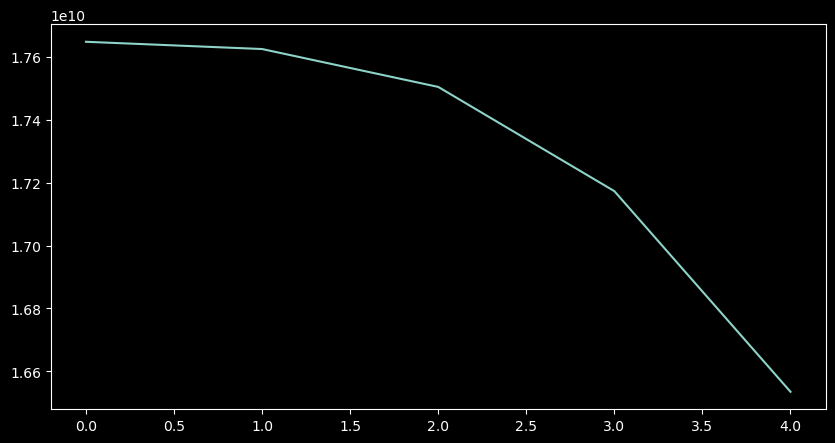

In [59]:
# ▶ train loss 출력
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

plt.plot(train_loss)
plt.gcf().set_size_inches(10 ,5)
plt.show();

In [60]:
predictions = torch.tensor([], dtype=torch.float) # ▶ 예측값 저장을 위한 빈 텐서
actual = torch.tensor([], dtype=torch.float) # ▶ 실제값 저장을 위한 빈 텐서


with torch.no_grad(): # ▶requires_grad 비활성화
    model.eval() # ▶ dropout과 같은 모델 학습시에만 사용하는 기법들을 비활성화

    # ▶ 배치 단위로 데이터를 예측하고 예측값과 실제값을 누적해서 저장
    for data in test_loader:
        inputs, values = data
        outputs = model(inputs)

        # ▶ torch.cat : 원하는 dimension방향으로 텐서를 나란하게 쌓아주는 기능 0(아래쪽), 1(오른쪽)
        predictions = torch.cat((predictions, outputs), 0)
        actual = torch.cat((actual, values), 0)

predictions = predictions.numpy()
actual = actual.numpy()

In [61]:
print(predictions.shape, actual.shape)

(122, 1) (122, 1)


In [62]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(list(predictions.squeeze()), list(actual.squeeze())))

126742.93

In [63]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [64]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

def evaluation(dataloader):

    predictions = torch.tensor([], dtype=torch.float) # ▶ 예측값 저장을 위한 빈 텐서
    actual = torch.tensor([], dtype=torch.float) # ▶ 실제값 저장을 위한 빈 텐서
    with torch.no_grad(): # ▶ requires_grad 비활성화
        model.eval() # ▶ dropout과 같은 모델 학습시에만 사용하는 기법들을 비활성화

        # ▶ 배치 단위로 데이터를 예측하고 예측값과 실제값을 누적해서 저장
        for data in dataloader:
            inputs, values = data
            outputs = model(inputs)

            # ▶ torch.cat : 원하는 dimension방향으로 텐서를 나란하게 쌓아주는 기능 0(아래쪽), 1(오른쪽)
            predictions = torch.cat((predictions, outputs), 0)
            actual = torch.cat((actual, values), 0)

    predictions = predictions.numpy()
    predictions = list(predictions.squeeze())

    actual = actual.numpy()
    actual = list(actual.squeeze())

    rmse = np.sqrt(mean_squared_error(predictions, actual))
    r2 = r2_score(actual, predictions)

    return rmse, r2


train_rmse, train_r2 = evaluation(train_dl)
test_rmse, test_r2 = evaluation(test_loader)

print('학습용 셋(rmse) :', train_rmse, '/ 학습용 셋(r2) :', train_r2)
print('테스트 셋(rmse) :', test_rmse, '/ 테스트 셋(r2) :', test_r2)

학습용 셋(rmse) : 126855.56 / 학습용 셋(r2) : -2.2706380833328326
테스트 셋(rmse) : 126742.93 / 테스트 셋(r2) : -1.9505895979224568
